In [1]:
import cv2 as cv
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
import math
from PIL import Image

In [2]:
A=np.loadtxt(open("riv1.csv", "rb"), delimiter=",")
R=A   #unnormalized
rows = A.shape[1]
cols = A.shape[0]
maxValue = np.amax(A)
minValue = np.amin(A)
fv=[]
for x in range(cols):
    for y in range(rows):
        A[x,y]=math.ceil(((A[x,y]-minValue)/(maxValue-minValue))*255) # Normalization

In [3]:
#plt.figure()
#fig,ax = plt.subplots(1)
#ax.imshow(A, cmap='gray')
#plt.savefig('riv1.png')
A

array([[  0.,   1.,   1., ..., 255., 255., 255.],
       [  1.,   0.,   1., ..., 255., 255., 255.],
       [  1.,   1.,   0., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ...,   0.,   1.,   1.],
       [255., 255., 255., ...,   1.,   0.,   1.],
       [255., 255., 255., ...,   1.,   1.,   0.]])

In [4]:
new_p = Image.fromarray(A) # convert A to png image
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p.save("ivat1.png") 

In [5]:
img = cv.imread('ivat1.png',0)  #read png

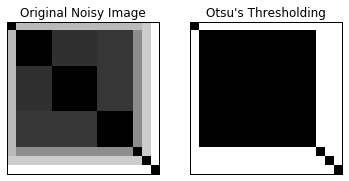

In [6]:
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images = [img, th2]
          
titles = ['Original Noisy Image',"Otsu's Thresholding"]

#f, axs = plt.subplots(1,2,figsize=(50,50))

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

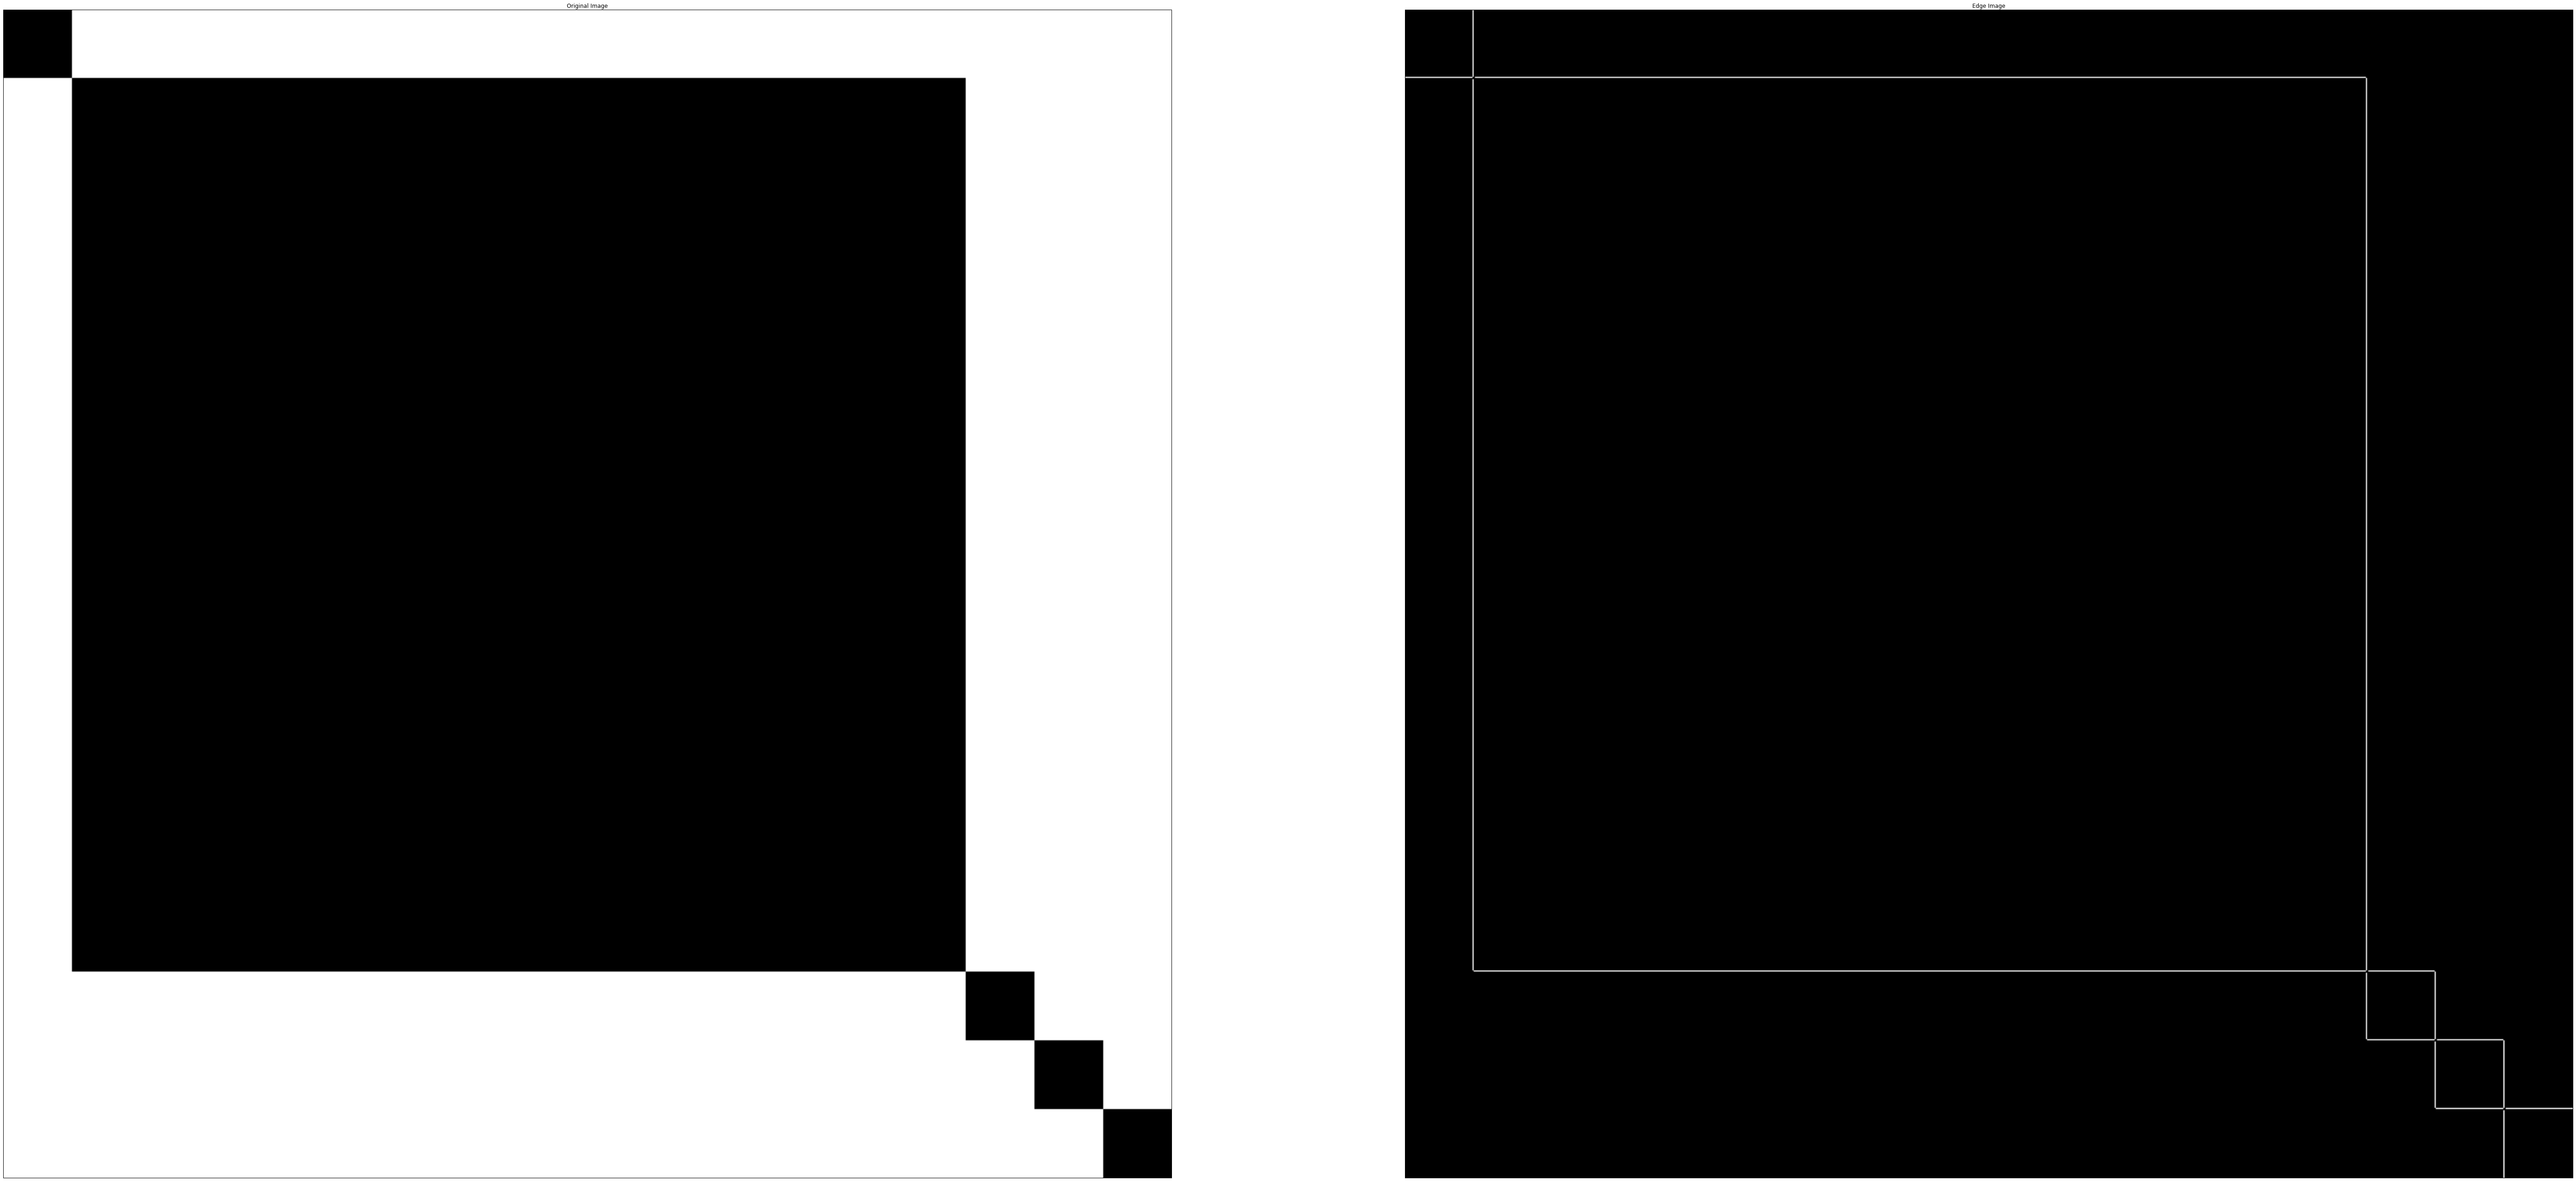

In [7]:
# canny edge detection
img = cv.imread('messi5.jpg',0)
edges = cv.Canny(th2,100,200)


f, axs = plt.subplots(1,2,figsize=(100,100))

plt.subplot(121),plt.imshow(th2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
edges.shape

(1003, 1003)

In [9]:
edges_ = np.logical_not(edges)   # take inverse of canny image to use with cv.distaceTransform for Chamfer matching
edges_ = edges_.astype(np.uint8)

In [10]:
n_rows = edges_.shape[0]
n_cols = edges_.shape[1]

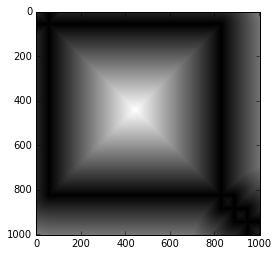

In [11]:
# Perform the distance transform algorithm
dist = cv.distanceTransform(edges_, cv.DIST_L2, 5)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist, dist, 0.0, 1.0, cv.NORM_MINMAX)
#cv.imshow('Distance Transform Image', dist)
#cv.waitKey()
plt.imshow(dist,cmap='gray')
plt.show()

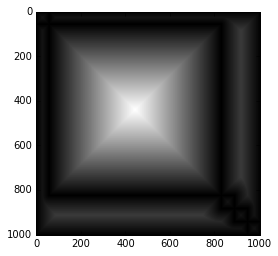

In [12]:
edges_[:, 0] = 0                  # detect image boundary also as canny edges and then use chamfer matching (results in Wang2010)
edges_[:, n_cols-1] = 0 
edges_[0, :] = 0
edges_[n_rows-1, :] = 0
# Perform the distance transform algorithm
dist_w_boundary, labels = cv.distanceTransformWithLabels(edges_, cv.DIST_L2, 5, cv.DIST_LABEL_CCOMP)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist_w_boundary, dist_w_boundary, 0.0, 1.0, cv.NORM_MINMAX)
#cv.imshow('Distance Transform Image', dist)
#cv.waitKey()
plt.imshow(dist_w_boundary,cmap='gray')
plt.show()

In [13]:
x = np.where(dist==0)[0]
y = np.where(dist==0)[1]

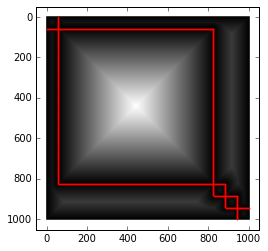

In [16]:
plt.imshow(dist_w_boundary,cmap='gray')
plt.scatter(x, y, color = 'red', s=0.5, marker='.')
plt.savefig('aVat1.png')